In [ ]:
# TODO
# add graticules

In [10]:
# Code to Fig. 1 of Sauthoff and others, 2023
#
# Written 2023-07-06 by W. Sauthoff (sauthoff@mines.edu)

In [1]:
# Install dependency not pre-installed in CryoCloud
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import packages
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import rioxarray
import xarray as xr

# Magic functions
%matplotlib widget

# Define data directories dependent on home environment
# replace with your directory file paths
if os.getenv('HOME') == '/home/jovyan':
    DATA_DIR = '/home/jovyan/data'
    SCRIPT_DIR = '/home/jovyan/repos_my/script_dir'
    OUTPUT_DIR = '/home/jovyan/1_outlines_candidates/output/'
elif os.getenv('HOME') == '/Users/Wilson': 
    DATA_DIR = '/Volumes/ExtremeSSD/data'
    SCRIPT_DIR = '/Users/Wilson/Documents/0-code/repos_my/script_dir'
    OUTPUT_DIR = '/Users/Wilson/Documents/0-code/1_outlines_candidates/output'

# Import datasets

In [4]:
# Import MODIS Mosaic of Antarctica surface imagery
# https://nsidc.org/data/nsidc-0730/versions/1
moa_lowres = DATA_DIR + '/surface_imagery/MODIS_MOA/2014/moa750_2014_hp1_v01.tif' 
# moa_highres = DATA_DIR + '/surface_imagery/MODIS_MOA/2014/moa125_2014_hp1_v01.tif' 

# Open into an xarray.DataArray, convert to dataset, and display
moa_da = rioxarray.open_rasterio(moa_lowres)
moa_ds = moa_da.to_dataset('band')
moa_ds

<xarray.Dataset>
Dimensions:      (y: 6964, x: 8056)
Coordinates:
  * x            (x) float64 -3.174e+06 -3.173e+06 ... 2.866e+06 2.867e+06
  * y            (y) float64 2.406e+06 2.405e+06 ... -2.816e+06 -2.816e+06
    spatial_ref  int64 0
Data variables:
    1            (y, x) uint16 ...
Attributes:
    AREA_OR_POINT:        Area
    TIFFTAG_XRESOLUTION:  1
    TIFFTAG_YRESOLUTION:  1
    scale_factor:         1.0
    add_offset:           0.0

In [5]:
# Import MODIS MOA 2009 and 2014 coastline and grounding line for plotting inset maps
# # https://nsidc.org/data/nsidc-0593/versions/1
# shp = DATA_DIR + '/boundaries/MODIS-MOA/2009/moa_2009_coastline_v02.0.shp' 
# moa_2009_coastline = gpd.read_file(shp)
# shp = DATA_DIR + '/boundaries/MODIS-MOA/2009/moa_2009_groundingline_v02.0.shp' 
# moa_2009_groundingline = gpd.read_file(shp)

# https://nsidc.org/data/nsidc-0730/versions/1
shp = DATA_DIR + '/boundaries/MODIS_MOA/2014/moa2014_coastline_v01.shp' 
moa_2014_coastline = gpd.read_file(shp)
shp = DATA_DIR + '/boundaries/MODIS_MOA/2014/moa2014_grounding_line_v01.shp' 
moa_2014_groundingline = gpd.read_file(shp)

In [6]:
# Import CryoSat-2 data (closed-source data acquired from Ben Smith)
CS2_Smith2017 = xr.open_dataset(DATA_DIR + '/altimetry/CryoSat2/CS2_SARIn_Smith2017method/mos_2010.5_2021.5.nc')

# View data set
CS2_Smith2017

<xarray.Dataset>
Dimensions:      (y: 4451, x: 5451, time: 45)
Coordinates:
  * y            (y) float64 -2.185e+06 -2.184e+06 ... 2.264e+06 2.265e+06
  * x            (x) float64 -2.665e+06 -2.664e+06 ... 2.784e+06 2.785e+06
  * time         (time) float64 2.01e+03 2.011e+03 ... 2.021e+03 2.022e+03
Data variables:
    mask         (y, x) float64 ...
    delta_h      (time, y, x) float64 ...
    count        (time, y, x) float64 ...
    spatial_ref  int64 ...
Attributes:
    fileName:                mos_2010.5_2021.5.h5
    shortName:               CS2-Smith-2017
    identifier_product_DOI:  doi:10.5194/tc-11-451-2017

In [7]:
# Import subglacial lake outlines 
exec(open(SCRIPT_DIR + '/Sauthoff2024_outlines.py').read())

In [ ]:
# Examining the CS2 data counts

# Figure generation

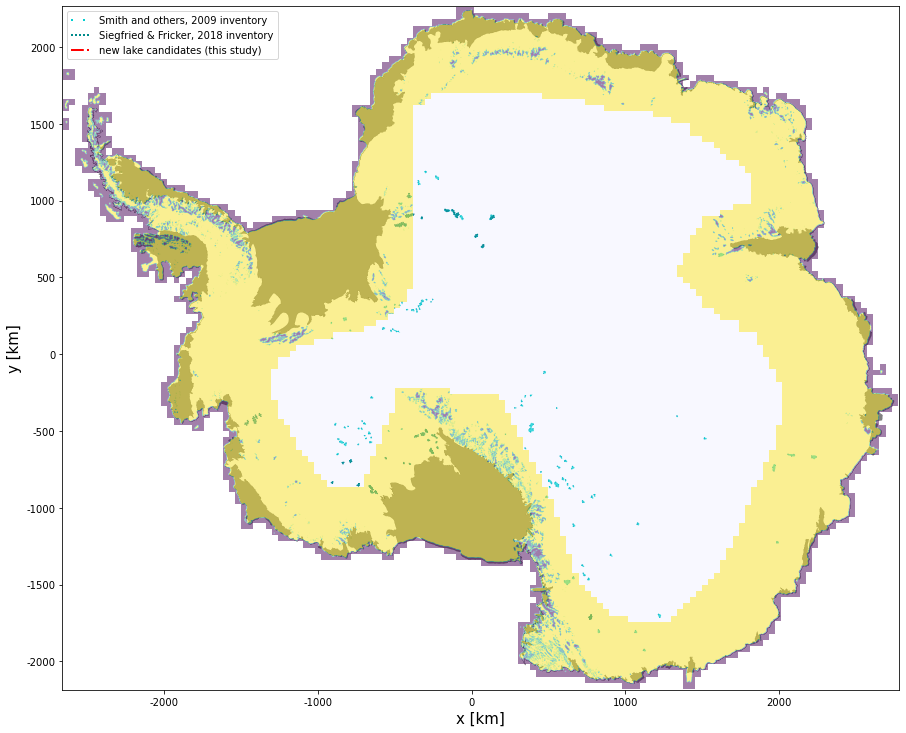

In [11]:
# Get the minimum and maximum values of the x and y dimensions
x_min, x_max = moa_da['x'].min(), moa_da['x'].max()
y_min, y_max = moa_da['y'].min(), moa_da['y'].max()

# Create fig and axes objects
fig, ax = plt.subplots(figsize=(15,15))

# # Plot MOA coast and grounding lines  
# moa_2009_coastline.plot(ax=ax, color='gray', edgecolor='k', linewidth=0.1, zorder=3)
# moa_2009_groundingline.plot(ax=ax, color='ghostwhite', edgecolor='k', linewidth=0.1, zorder=3)

# Plot MOA coast and grounding lines  
moa_2014_coastline.plot(ax=ax, color='gray', edgecolor='k', linewidth=0.1, zorder=1)
moa_2014_groundingline.plot(ax=ax, color='ghostwhite', edgecolor='k', linewidth=0.1, zorder=1)

# # Plot MOA imagery  
# ax.imshow(moa_da[0,:,:], cmap="gray", clim=[13000, 17000], extent=[x_min, x_max, y_min, y_max])

# Overlay published active subglacial lake outlines as translucent polygon and dotted line outlines 
Smith2009_outlines.boundary.plot(ax=ax, facecolor='darkturquoise', linestyle=(0, (1, 5)), linewidth=1, alpha=0.75)
Smith2009_outlines.boundary.plot(ax=ax, edgecolor='darkturquoise', linestyle=(0, (1, 5)), linewidth=1)
SiegfriedFricker2018_SF18outlines.boundary.plot(ax=ax, facecolor='darkcyan', linestyle=(0, (1, 1)), linewidth=1, alpha=0.75)
SiegfriedFricker2018_SF18outlines.boundary.plot(ax=ax, edgecolor='darkcyan', linestyle=(0, (1, 1)), linewidth=1)

# Plot extent of CryoSat-2 SARIn coverage
# ax.imshow(CS2_dh.delta_h[0,:,:], origin='upper', color='yellow', extent=[min(CS2_dh.x), max(CS2_dh.x), min(CS2_dh.y), max(CS2_dh.y)])
# xarray.plot.imshow(CS2_dh['mask'], zorder=2)
ax.imshow(CS2_dh['mask'], alpha=0.5, extent=[min(CS2_dh.x), max(CS2_dh.x), min(CS2_dh.y), max(CS2_dh.y)], zorder=2)

# Create lines for legend
Smith2009 = plt.Line2D((0, 1), (0, 0), color='darkturquoise', linestyle=(0, (1, 5)), linewidth=2)
SiegfriedFricker2018 = plt.Line2D((0, 1), (0, 0), color='darkcyan', linestyle=(0, (1, 1)), linewidth=2)
# Livingstone2023 = plt.Line2D((0, 1), (0, 0), color='darkslategray', linestyle=(0, (1, 1)), linewidth=2)
lake_candidates = plt.Line2D((0, 1), (0, 0), color='red', linestyle='dashdot', linewidth=2)
# CS2InSAR_coverage = 
        
# Create legend
ax.legend([Smith2009, SiegfriedFricker2018, 
        #    Livingstone2023, 
           lake_candidates],
    ['Smith and others, 2009 inventory','Siegfried & Fricker, 2018 inventory', 
    #  'Livingstone and others, 2023 inventory', 
    'new lake candidates (this study)'], 
    loc='upper left')

# Change polar stereographic m to km
km_scale = 1e3
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/km_scale))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/km_scale))
ax.yaxis.set_major_formatter(ticks_y)  

# Label axes
ax.set_xlabel('x [km]', size=15)
ax.set_ylabel('y [km]', size=15)

plt.show()

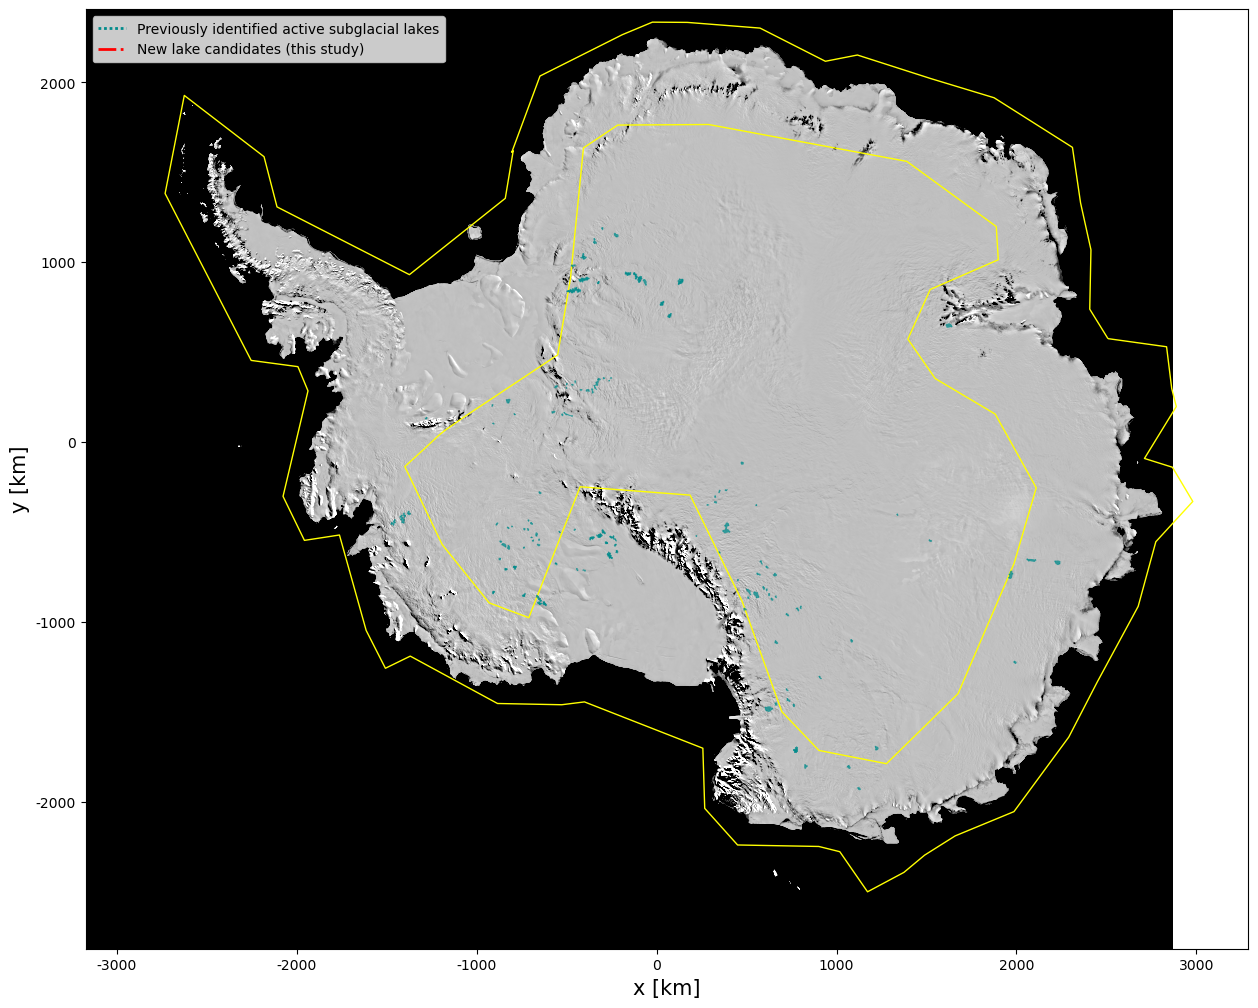

In [20]:
# Get the minimum and maximum values of the x and y dimensions
x_min, x_max = moa_da['x'].min(), moa_da['x'].max()
y_min, y_max = moa_da['y'].min(), moa_da['y'].max()

# Create fig and axes objects
fig, ax = plt.subplots(figsize=(15,15))

# Plot MOA imagery  
ax.imshow(moa_da[0,:,:], cmap="gray", clim=[13000, 17000], extent=[x_min, x_max, y_min, y_max])

# # Plot MOA coast and grounding lines  
# moa_2014_coastline.plot(ax=ax, color='gray', edgecolor='k', linewidth=0.1, zorder=1)
# moa_2014_groundingline.plot(ax=ax, color='ghostwhite', edgecolor='k', linewidth=0.1, zorder=1)

# Overlay published active subglacial lake outlines as translucent polygon and dotted line outlines 
Smith2009_outlines.boundary.plot(ax=ax, facecolor='darkcyan', edgecolor='darkcyan', linestyle=(0, (1, 5)), linewidth=1, alpha=0.75)
# Smith2009_outlines.boundary.plot(ax=ax, edgecolor='darkturquoise', linestyle=(0, (1, 5)), linewidth=1)
SiegfriedFricker2018_SF18outlines.boundary.plot(ax=ax, facecolor='darkcyan', edgecolor='darkcyan', linestyle=(0, (1, 1)), linewidth=1, alpha=0.75)
# SiegfriedFricker2018_SF18outlines.boundary.plot(ax=ax, edgecolor='darkcyan', linestyle=(0, (1, 1)), linewidth=1)

# Plot extent of CryoSat-2 SARIn coverage
# # Iterate over each GeoDataFrame in the dictionary
# for key, gdf in gdfs.items():
#     # Plot each GeoDataFrame with a unique color
gdfs['gdf_3.1'].plot(ax=ax, edgecolor='yellow', facecolor='none', label=key)
# gdfs['gdf_3.6'][gdfs['gdf_3.6']['description'] == 'LRM over Antarctica ice sheet'].plot(ax=ax, edgecolor='yellow', facecolor='none', label=key)
# gdfs['gdf_3.6'].plot(ax=ax, edgecolor='yellow', facecolor='none', label=key)

# Create lines for legend
Smith2009 = plt.Line2D((0, 1), (0, 0), color='darkturquoise', linestyle=(0, (1, 5)), linewidth=2)
SiegfriedFricker2018 = plt.Line2D((0, 1), (0, 0), color='darkcyan', linestyle=(0, (1, 1)), linewidth=2)
# Livingstone2023 = plt.Line2D((0, 1), (0, 0), color='darkslategray', linestyle=(0, (1, 1)), linewidth=2)
lake_candidates = plt.Line2D((0, 1), (0, 0), color='red', linestyle='dashdot', linewidth=2)
# CS2InSAR_coverage = 

# Create legend
ax.legend([#Smith2009, 
           SiegfriedFricker2018, 
           # Livingstone2023, 
           lake_candidates],
    [#'Smith and others, 2009 inventory',
     'Previously identified active subglacial lakes', 
     # 'Livingstone and others, 2023 inventory', 
    'New lake candidates (this study)'], 
    loc='upper left')

# Change polar stereographic m to km
km_scale = 1e3
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/km_scale))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/km_scale))
ax.yaxis.set_major_formatter(ticks_y)  

# Label axes
ax.set_xlabel('x [km]', size=15)
ax.set_ylabel('y [km]', size=15)

plt.show()